In [1]:
#Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Option 2, Part 1: Using the two data sets provided, investigate the
measurements of the PM10 particulate matter 

In [2]:
#Cleaning the data to improve readability

marylebone_filename = "Marylebone_AirQualityDataHourly_2018-2021_clean.csv"

marylebone_data = pd.read_csv(marylebone_filename,
                             skiprows = 4,
                             na_values = "No data",
                             index_col = "Date Time",
                             parse_dates= ["Date Time"])

marylebone_data

,Hour of Day,Day of Week,PM10 particulate matter (Hourly measured),Status PM10,PM2.5 particulate matter (Hourly measured),Status PM2.5,Nitrogen dioxide,Status NO2
Date Time,,,,,,,,
2018-01-01 00:00:00,0,6,NaN,N ugm-3 (TEOM FDMS),NaN,V ugm-3 (TEOM FDMS),NaN,V ugm-3
2018-01-01 01:00:00,1,0,24.6,V ugm-3 (TEOM FDMS),12.7,V ugm-3 (TEOM FDMS),79.05960,V ugm-3
2018-01-01 02:00:00,2,0,18.7,V ugm-3 (TEOM FDMS),11.6,V ugm-3 (TEOM FDMS),97.05587,V ugm-3
2018-01-01 03:00:00,3,0,17.2,V ugm-3 (TEOM FDMS),7.6,V ugm-3 (TEOM FDMS),101.07355,V ugm-3
2018-01-01 04:00:00,4,0,10.8,V ugm-3 (TEOM FDMS),2.3,V ugm-3 (TEOM FDMS),81.56557,V ugm-3
...,...,...,...,...,...,...,...,...
2021-02-28 19:00:00,19,6,21.0,N ugm-3 (TEOM FDMS),13.1,N ugm-3 (TEOM FDMS),49.72500,N ugm-3
2021-02-28 20:00:00,20,6,28.4,N ugm-3 (TEOM FDMS),15.2,N ugm-3 (TEOM FDMS),56.41875,N ugm-3
2021-02-28 21:00:00,21,6,10.9,N ugm-3 (TEOM FDMS),8.2,N ugm-3 (TEOM FDMS),39.20625,N ugm-3


Calculating average differences across each season for Marylebone for each month

In [3]:
#access year 2018 only
year = 2018

#Having used the parse_dates above python can read the year specifically
mask = (marylebone_data.index.year == year)

#Using the mask and .loc to select specific rows
marylebone_data_year_2018 = marylebone_data.loc[mask]

print(marylebone_data_year_2018)

                     Hour of Day  Day of Week  \
Date Time                                       
2018-01-01 00:00:00            0            6   
2018-01-01 01:00:00            1            0   
2018-01-01 02:00:00            2            0   
2018-01-01 03:00:00            3            0   
2018-01-01 04:00:00            4            0   
...                          ...          ...   
2018-12-31 19:00:00           19            0   
2018-12-31 20:00:00           20            0   
2018-12-31 21:00:00           21            0   
2018-12-31 22:00:00           22            0   
2018-12-31 23:00:00           23            0   

                     PM10 particulate matter (Hourly measured)  \
Date Time                                                        
2018-01-01 00:00:00                                        NaN   
2018-01-01 01:00:00                                       24.6   
2018-01-01 02:00:00                                       18.7   
2018-01-01 03:00:00             

In [4]:
#Using the resample to calcular monthly means for the year 2018
marylebone_2018_monthly = marylebone_data_year_2018.resample("M").mean()

marylebone_2018_monthly

,Hour of Day,Day of Week,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Nitrogen dioxide
Date Time,,,,,
2018-01-31,11.5,2.814516,24.344294,14.193844,87.182335
2018-02-28,11.5,3.000000,23.135268,13.304790,79.574224
2018-03-31,11.5,3.096774,27.383537,16.938549,87.381064
2018-04-30,11.5,3.000000,27.954839,18.009812,99.672162
2018-05-31,11.5,2.903226,27.530702,18.281551,88.380575
2018-06-30,11.5,3.100000,20.361560,13.155048,79.216402
2018-07-31,11.5,2.935484,24.165843,15.935836,92.571452
2018-08-31,11.5,3.000000,18.919892,12.612017,75.208573
2018-09-30,11.5,3.166667,21.661029,15.524618,86.524505


In [5]:
#Cleaning the data to improve readability
rochester_filename = "Rochester_AirQualityDataHourly_2018-2021_clean.csv"

rochester_data = pd.read_csv(rochester_filename,
                             skiprows = 4,
                             na_values = "No data",
                             index_col = "Date Time",
                            parse_dates = ["Date Time"])

rochester_data

,Hour of Day,Day of Week,PM10 particulate matter (Hourly measured),Status PM10,PM2.5 particulate matter (Hourly measured),Status PM2.5,Nitrogen dioxide,Status NO2
Date Time,,,,,,,,
2018-01-01 00:00:00,0,6,NaN,N ugm-3 (TEOM FDMS),NaN,V ugm-3 (TEOM FDMS),NaN,V ugm-3
2018-01-01 01:00:00,1,0,11.300,V ugm-3 (TEOM FDMS),3.400,V ugm-3 (TEOM FDMS),1.17542,V ugm-3
2018-01-01 02:00:00,2,0,8.700,V ugm-3 (TEOM FDMS),3.400,V ugm-3 (TEOM FDMS),1.17568,V ugm-3
2018-01-01 03:00:00,3,0,5.800,V ugm-3 (TEOM FDMS),2.900,V ugm-3 (TEOM FDMS),1.26732,V ugm-3
2018-01-01 04:00:00,4,0,8.300,V ugm-3 (TEOM FDMS),-2.200,V ugm-3 (TEOM FDMS),1.87301,V ugm-3
...,...,...,...,...,...,...,...,...
2021-02-28 19:00:00,19,6,9.300,N ugm-3 (FIDAS),6.934,N ugm-3 (Ref.eq),14.28303,N ugm-3
2021-02-28 20:00:00,20,6,10.200,N ugm-3 (FIDAS),7.736,N ugm-3 (Ref.eq),10.30503,N ugm-3
2021-02-28 21:00:00,21,6,10.875,N ugm-3 (FIDAS),8.160,N ugm-3 (Ref.eq),19.15656,N ugm-3


Calculating average differences across each season for Rochester for each month

In [6]:
#access year 2018 only
year = 2018

#Having used the parse_dates above python can read the year specifically
mask = (rochester_data.index.year == year)

#Using the mask and .loc to select specific rows
rochester_data_year_2018 = rochester_data.loc[mask]

print(rochester_data_year_2018)

                     Hour of Day  Day of Week  \
Date Time                                       
2018-01-01 00:00:00            0            6   
2018-01-01 01:00:00            1            0   
2018-01-01 02:00:00            2            0   
2018-01-01 03:00:00            3            0   
2018-01-01 04:00:00            4            0   
...                          ...          ...   
2018-12-31 19:00:00           19            0   
2018-12-31 20:00:00           20            0   
2018-12-31 21:00:00           21            0   
2018-12-31 22:00:00           22            0   
2018-12-31 23:00:00           23            0   

                     PM10 particulate matter (Hourly measured)  \
Date Time                                                        
2018-01-01 00:00:00                                        NaN   
2018-01-01 01:00:00                                     11.300   
2018-01-01 02:00:00                                      8.700   
2018-01-01 03:00:00             

In [7]:
#Using the resample to calcular monthly means for the year 2018
rochester_2018_monthly = rochester_data_year_2018.resample("M").mean()

rochester_2018_monthly

,Hour of Day,Day of Week,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Nitrogen dioxide
Date Time,,,,,
2018-01-31,11.5,2.814516,15.729116,7.255663,14.359732
2018-02-28,11.5,3.000000,16.161458,8.594745,13.064711
2018-03-31,11.5,3.096774,21.769530,11.584641,14.968680
2018-04-30,11.5,3.000000,23.968373,12.328209,13.548774
2018-05-31,11.5,2.903226,28.429515,17.706452,14.562898
2018-06-30,11.5,3.100000,17.538387,8.505189,7.387770
2018-07-31,11.5,2.935484,20.556989,11.407745,10.742881
2018-08-31,11.5,3.000000,12.502435,5.894010,10.910651
2018-09-30,11.5,3.166667,11.750696,7.018916,12.537807


Plotting the data for rochester and marylebone

In [8]:
#Using the concatenate function to create a new DataFrame combining Rochester and Marylebone data
monthly_data_2018_df = pd.concat([rochester_2018_monthly['PM10 particulate matter (Hourly measured)'], marylebone_2018_monthly['PM10 particulate matter (Hourly measured)']], axis=1)

#Labelling the columns correctly
monthly_data_2018_df.columns = ['Rochester PM10', 'Marylebone PM10']
print(monthly_data_2018_df)

            Rochester PM10  Marylebone PM10
Date Time                                  
2018-01-31       15.729116        24.344294
2018-02-28       16.161458        23.135268
2018-03-31       21.769530        27.383537
2018-04-30       23.968373        27.954839
2018-05-31       28.429515        27.530702
2018-06-30       17.538387        20.361560
2018-07-31       20.556989        24.165843
2018-08-31       12.502435        18.919892
2018-09-30       11.750696        21.661029
2018-10-31       13.122663        21.808288
2018-11-30       17.016643        26.800694
2018-12-31       11.751008        22.446927


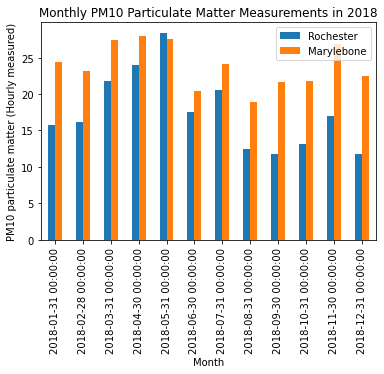

In [9]:
#Plotting a bar chart for the monthly data
monthly_data_2018_df.plot.bar()

#Labelling the features of the graph
plt.ylabel('PM10 particulate matter (Hourly measured)')
plt.title('Monthly PM10 Particulate Matter Measurements in 2018')
plt.legend(['Rochester', 'Marylebone'])
plt.xlabel('Month')

plt.show()

Calculating the monthly averages for 2020

In [10]:
#access year 2020 only
year = 2020

#Having used the parse_dates above python can read the year specifically
mask = (marylebone_data.index.year == year)

#Using the mask and .loc to select specific rows
marylebone_data_year_2020 = marylebone_data.loc[mask]

print(marylebone_data_year_2020)


#Using the resample to calcular monthly means for the year 2020
marylebone_2020_monthly = marylebone_data_year_2020.resample("M").mean()

marylebone_2020_monthly

                     Hour of Day  Day of Week  \
Date Time                                       
2020-01-01 00:00:00            0            2   
2020-01-01 01:00:00            1            2   
2020-01-01 02:00:00            2            2   
2020-01-01 03:00:00            3            2   
2020-01-01 04:00:00            4            2   
...                          ...          ...   
2020-12-31 19:00:00           19            3   
2020-12-31 20:00:00           20            3   
2020-12-31 21:00:00           21            3   
2020-12-31 22:00:00           22            3   
2020-12-31 23:00:00           23            3   

                     PM10 particulate matter (Hourly measured)  \
Date Time                                                        
2020-01-01 00:00:00                                       40.6   
2020-01-01 01:00:00                                       69.0   
2020-01-01 02:00:00                                       45.0   
2020-01-01 03:00:00             

,Hour of Day,Day of Week,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Nitrogen dioxide
Date Time,,,,,
2020-01-31,11.5,3.000000,18.922254,11.972543,60.279155
2020-02-29,11.5,3.068966,17.310345,7.115971,65.201690
2020-03-31,11.5,2.935484,16.610931,8.447177,51.722147
2020-04-30,11.5,2.966667,22.016106,13.681285,30.741727
2020-05-31,11.5,3.193548,14.117339,7.035618,23.324597
2020-06-30,11.5,2.833333,12.640972,6.986908,35.041924
2020-07-31,11.5,3.000000,9.487865,5.774381,31.569037
2020-08-31,11.5,3.064516,15.890909,11.094715,36.572061
2020-09-30,11.5,2.900000,NaN,9.626389,43.690390


In [11]:
#access year 2020 only
year = 2020

#Having used the parse_dates above python can read the year specifically
mask = (rochester_data.index.year == year)

#Using the mask and .loc to select specific rows
rochester_data_year_2020 = rochester_data.loc[mask]

print(rochester_data_year_2020)


#Using the resample to calcular monthly means for the year 2020
rochester_2020_monthly = rochester_data_year_2020.resample("M").mean()

rochester_2020_monthly

                     Hour of Day  Day of Week  \
Date Time                                       
2020-01-01 00:00:00            0            2   
2020-01-01 01:00:00            1            2   
2020-01-01 02:00:00            2            2   
2020-01-01 03:00:00            3            2   
2020-01-01 04:00:00            4            2   
...                          ...          ...   
2020-12-31 19:00:00           19            3   
2020-12-31 20:00:00           20            3   
2020-12-31 21:00:00           21            3   
2020-12-31 22:00:00           22            3   
2020-12-31 23:00:00           23            3   

                     PM10 particulate matter (Hourly measured)  \
Date Time                                                        
2020-01-01 00:00:00                                     39.675   
2020-01-01 01:00:00                                     41.325   
2020-01-01 02:00:00                                     45.525   
2020-01-01 03:00:00             

,Hour of Day,Day of Week,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Nitrogen dioxide
Date Time,,,,,
2020-01-31,11.5,3.000000,14.126590,10.306103,14.975160
2020-02-29,11.5,3.068966,11.175455,6.896848,8.392394
2020-03-31,11.5,2.935484,14.985276,9.768240,7.242139
2020-04-30,11.5,2.966667,27.127674,17.566700,11.612517
2020-05-31,11.5,3.193548,15.506065,9.698570,8.103635
2020-06-30,11.5,2.833333,13.985382,9.023418,8.496233
2020-07-31,11.5,3.000000,10.191499,5.103242,6.856848
2020-08-31,11.5,3.064516,19.312735,12.463060,8.326115
2020-09-30,11.5,2.900000,13.965517,8.560230,9.369050


In [12]:
#Using the concatenate function to create a new DataFrame combining Rochester and Marylebone data
monthly_data_2020_df = pd.concat([rochester_2020_monthly['PM10 particulate matter (Hourly measured)'], marylebone_2020_monthly['PM10 particulate matter (Hourly measured)']], axis=1)

#Labelling the columns correctly
monthly_data_2020_df.columns = ['Rochester PM10', 'Marylebone PM10']
print(monthly_data_2020_df)

            Rochester PM10  Marylebone PM10
Date Time                                  
2020-01-31       14.126590        18.922254
2020-02-29       11.175455        17.310345
2020-03-31       14.985276        16.610931
2020-04-30       27.127674        22.016106
2020-05-31       15.506065        14.117339
2020-06-30       13.985382        12.640972
2020-07-31       10.191499         9.487865
2020-08-31       19.312735        15.890909
2020-09-30       13.965517              NaN
2020-10-31        9.400907              NaN
2020-11-30       18.575244        20.501905
2020-12-31       10.983187        16.230929


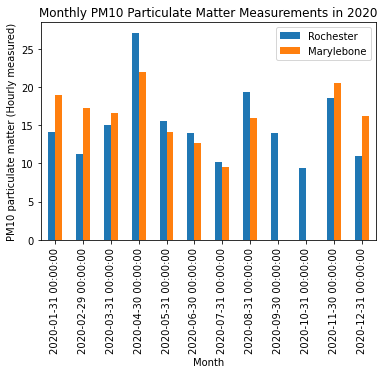

In [13]:
#Plotting a bar chart for the monthly data
monthly_data_2020_df.plot.bar()

#Labelling the features of the graph
plt.ylabel('PM10 particulate matter (Hourly measured)')
plt.title('Monthly PM10 Particulate Matter Measurements in 2020')
plt.legend(['Rochester', 'Marylebone'])
plt.xlabel('Month')

plt.show()

Calculating average for each year in both Marylebone and Rochester

In [14]:
#Using the resample function to calculate the year means for both locations
rochester_yearly_data = rochester_data.resample("Y").mean()
marylebone_yearly_data = marylebone_data.resample("Y").mean()

In [15]:
#Printing the DF
rochester_yearly_data

,Hour of Day,Day of Week,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Nitrogen dioxide
Date Time,,,,,
2018-12-31,11.5,2.992466,17.442980,10.085649,13.017258
2019-12-31,11.5,2.994521,14.953433,10.836814,12.541865
2020-12-31,11.5,2.997268,14.926147,9.676555,10.018673
2021-12-31,11.5,3.101695,13.885083,10.027129,15.072982


In [16]:
#Printing the DF
marylebone_yearly_data

,Hour of Day,Day of Week,PM10 particulate matter (Hourly measured),PM2.5 particulate matter (Hourly measured),Nitrogen dioxide
Date Time,,,,,
2018-12-31,11.5,2.992466,23.862892,15.799961,84.713994
2019-12-31,11.5,2.994521,22.236206,14.345320,62.674946
2020-12-31,11.5,2.997268,16.210678,9.971269,42.694279
2021-12-31,11.5,3.101695,17.416503,11.231709,41.275992


In [17]:
#Using the concatenate function to create a new DataFrame combining data for both locations
yearly_data_df = pd.concat([rochester_yearly_data['PM10 particulate matter (Hourly measured)'], marylebone_yearly_data['PM10 particulate matter (Hourly measured)']], axis=1)

#Labelling the columns correctly
yearly_data_df.columns = ['Rochester PM10', 'Marylebone PM10']

print(yearly_data_df)

            Rochester PM10  Marylebone PM10
Date Time                                  
2018-12-31       17.442980        23.862892
2019-12-31       14.953433        22.236206
2020-12-31       14.926147        16.210678
2021-12-31       13.885083        17.416503


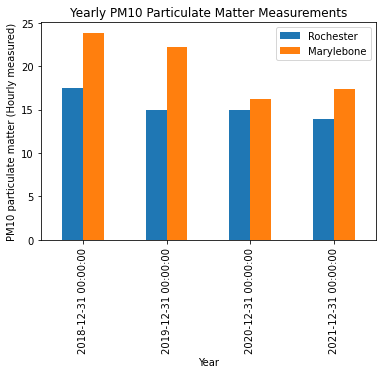

In [18]:
#Plotting a bar chart for the yearly data
yearly_data_df.plot.bar()

#Labelling the features of the graph
plt.ylabel('PM10 particulate matter (Hourly measured)')
plt.title('Yearly PM10 Particulate Matter Measurements')
plt.legend(['Rochester', 'Marylebone'])
plt.xlabel('Year')

plt.show()

Calculating average differences across each hour for Marylebone 

In [19]:
#Re indexing the DataFrame with the "Hour of the day" column
marylebone_data_new = marylebone_data.set_index('Hour of Day')
marylebone_data_new

,Day of Week,PM10 particulate matter (Hourly measured),Status PM10,PM2.5 particulate matter (Hourly measured),Status PM2.5,Nitrogen dioxide,Status NO2
Hour of Day,,,,,,,
0,6,NaN,N ugm-3 (TEOM FDMS),NaN,V ugm-3 (TEOM FDMS),NaN,V ugm-3
1,0,24.6,V ugm-3 (TEOM FDMS),12.7,V ugm-3 (TEOM FDMS),79.05960,V ugm-3
2,0,18.7,V ugm-3 (TEOM FDMS),11.6,V ugm-3 (TEOM FDMS),97.05587,V ugm-3
3,0,17.2,V ugm-3 (TEOM FDMS),7.6,V ugm-3 (TEOM FDMS),101.07355,V ugm-3
4,0,10.8,V ugm-3 (TEOM FDMS),2.3,V ugm-3 (TEOM FDMS),81.56557,V ugm-3
...,...,...,...,...,...,...,...
19,6,21.0,N ugm-3 (TEOM FDMS),13.1,N ugm-3 (TEOM FDMS),49.72500,N ugm-3
20,6,28.4,N ugm-3 (TEOM FDMS),15.2,N ugm-3 (TEOM FDMS),56.41875,N ugm-3
21,6,10.9,N ugm-3 (TEOM FDMS),8.2,N ugm-3 (TEOM FDMS),39.20625,N ugm-3


In [20]:
#Initalizing the mean and "i" values

i = 0
mean_marylebone = []

#Creating a while loop that averages the PM10 value for each hour and then stores it in an appropriately named variable
while i < 24:
    
    #Creating a variable which accesses all the information for a specific hour i
    marylebone_data_i_hour = marylebone_data_new.loc[i]
    
    #Calculates the average PM10 level for hour i
    m_hourly_data_i_mean = marylebone_data_i_hour['PM10 particulate matter (Hourly measured)'].mean()
    
    #print(i," hour mean = ",hourly_data_i)
    
    #Creating a list of all the averages for each hour
    mean_marylebone.append(m_hourly_data_i_mean)
    
    #Adding 1 to ensure it loops
    i +=1

In [21]:
#Creating a new data frame which collates all the averages for each hour
marylebone_hourly_data = pd.DataFrame({"hour": range (24),
              "mean": mean_marylebone})

#Indexing the new DF with "hour"
marylebone_hourly_data = marylebone_hourly_data.set_index("hour")
marylebone_hourly_data

,mean
hour,
0,20.947738
1,19.890279
2,18.600771
3,17.875072
4,17.362753
5,17.636311
6,18.655299
7,20.497502
8,21.516297


Calculating average differences across each hour for Rochester

In [22]:
#Re indexing the DataFrame with the "Hour of the day" column
rochester_data_new = rochester_data.set_index('Hour of Day')
rochester_data_new

,Day of Week,PM10 particulate matter (Hourly measured),Status PM10,PM2.5 particulate matter (Hourly measured),Status PM2.5,Nitrogen dioxide,Status NO2
Hour of Day,,,,,,,
0,6,NaN,N ugm-3 (TEOM FDMS),NaN,V ugm-3 (TEOM FDMS),NaN,V ugm-3
1,0,11.300,V ugm-3 (TEOM FDMS),3.400,V ugm-3 (TEOM FDMS),1.17542,V ugm-3
2,0,8.700,V ugm-3 (TEOM FDMS),3.400,V ugm-3 (TEOM FDMS),1.17568,V ugm-3
3,0,5.800,V ugm-3 (TEOM FDMS),2.900,V ugm-3 (TEOM FDMS),1.26732,V ugm-3
4,0,8.300,V ugm-3 (TEOM FDMS),-2.200,V ugm-3 (TEOM FDMS),1.87301,V ugm-3
...,...,...,...,...,...,...,...
19,6,9.300,N ugm-3 (FIDAS),6.934,N ugm-3 (Ref.eq),14.28303,N ugm-3
20,6,10.200,N ugm-3 (FIDAS),7.736,N ugm-3 (Ref.eq),10.30503,N ugm-3
21,6,10.875,N ugm-3 (FIDAS),8.160,N ugm-3 (Ref.eq),19.15656,N ugm-3


In [23]:
#Initalizing the mean and "i" values
i = 0
mean_rochester= []

#Creating a while loop that averages the PM10 value for each hour and then stores it in an appropriately named variable
while i < 24:
    
    #Creating a variable which accesses all the information for a specific hour i
    rochester_data_i_hour = rochester_data_new.loc[i]
    
    #Calculates the average PM10 level for hour i
    r_hourly_data_i_mean = rochester_data_i_hour['PM10 particulate matter (Hourly measured)'].mean()
    
    #print(i," hour mean = ",hourly_data_i)
    
    #Creating a list of all the averages for each hour
    mean_rochester.append(r_hourly_data_i_mean)
    
    #Adding 1 to ensure it loops
    i +=1

In [24]:
#Creating a new data frame which collates all the averages for each hour
rochester_hourly_data = pd.DataFrame({"hour": range (24),
              "mean": mean_rochester})

#Indexing the new DF with "hour"
rochester_hourly_data = rochester_hourly_data.set_index("hour")
rochester_hourly_data

,mean
hour,
0,16.318597
1,16.050567
2,15.881234
3,15.822058
4,15.639930
5,15.450501
6,15.318330
7,15.344279
8,15.521451


Plotting a line graph comparing the Rochester and Marylebone hourly data

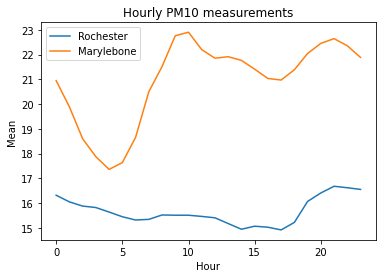

In [25]:
#Creating a plot for the graph
fig, ax = plt.subplots()

#Plotting the means using the same axes
ax.plot(rochester_hourly_data["mean"], label="Rochester")
ax.plot(marylebone_hourly_data["mean"], label="Marylebone")

#Labelling the features of the graph
ax.set_xlabel("Hour")
ax.set_ylabel("Mean")
ax.set_title("Hourly PM10 measurements")

#Plotting the legend
ax.legend()

Option 2, Part 2: Investigate the impact of meteorological conditions on the measurements of particulate matter at Marylebone

In [26]:
#Accessing the heathrow data 

heathrow_filename = "Weather_data_hourly_Heathrow-Airport.csv"

heathrow_data = pd.read_csv(heathrow_filename,
                           index_col = "Date_Hour",
                           na_values = "NaN",
                           parse_dates= ["Date_Hour"])

heathrow_data

,Temperature (degrees C),Precipitation (mm),Wind direction (degrees),Wind speed (km/h),Wind gust (km/h),Pressure (hPa)
Date_Hour,,,,,,
1948-12-01 00:00:00,1.9,NaN,NaN,0.0,NaN,NaN
1948-12-01 01:00:00,1.9,NaN,NaN,0.0,NaN,NaN
1948-12-01 02:00:00,1.9,NaN,NaN,0.0,NaN,NaN
1948-12-01 03:00:00,0.8,NaN,NaN,0.0,NaN,NaN
1948-12-01 04:00:00,1.3,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...
2021-02-28 19:00:00,7.4,0.0,30.0,8.0,24.1,1034.4
2021-02-28 20:00:00,6.9,0.0,40.0,9.0,24.1,1034.2
2021-02-28 21:00:00,6.5,0.0,60.0,15.0,22.2,1034.1


In [27]:
#access year 2018 only
year = 2018

#Having used the parse_dates above python can read the year specifically
mask = (heathrow_data.index.year == year)

#Using the mask and .loc to select specific rows
heathrow_data_year_2018 = heathrow_data.loc[mask]

heathrow_data_year_2018

,Temperature (degrees C),Precipitation (mm),Wind direction (degrees),Wind speed (km/h),Wind gust (km/h),Pressure (hPa)
Date_Hour,,,,,,
2018-01-01 00:00:00,7.0,NaN,250.0,31.7,NaN,997.5
2018-01-01 01:00:00,6.5,NaN,250.0,29.5,NaN,998.5
2018-01-01 02:00:00,6.0,NaN,240.0,24.1,NaN,999.5
2018-01-01 03:00:00,5.6,NaN,240.0,25.9,NaN,999.5
2018-01-01 04:00:00,6.0,NaN,230.0,20.5,NaN,999.7
...,...,...,...,...,...,...
2018-12-31 19:00:00,9.0,0.0,270.0,14.8,24.1,1035.3
2018-12-31 20:00:00,8.9,0.0,270.0,14.8,24.1,1035.2
2018-12-31 21:00:00,9.1,0.0,290.0,13.0,25.9,1035.3


Comparing different weather indicators and Particulate Matter Leves (PM10 and PM 2.5)

                     Temperature (degrees C)  PM10  PM 2.5
2018-01-01 00:00:00                      7.0   NaN     NaN
2018-01-01 01:00:00                      6.5  24.6    12.7
2018-01-01 02:00:00                      6.0  18.7    11.6
2018-01-01 03:00:00                      5.6  17.2     7.6
2018-01-01 04:00:00                      6.0  10.8     2.3
...                                      ...   ...     ...
2018-12-31 19:00:00                      9.0  17.4    16.2
2018-12-31 20:00:00                      8.9  16.9    15.3
2018-12-31 21:00:00                      9.1  16.1    14.4
2018-12-31 22:00:00                      9.0  19.2    14.5
2018-12-31 23:00:00                      9.1  17.6    12.8

[8760 rows x 3 columns]


Text(0.5, 1.0, 'Temperature against PM 2.5 levels in Marylebone 2018')

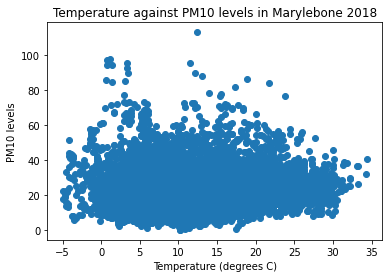

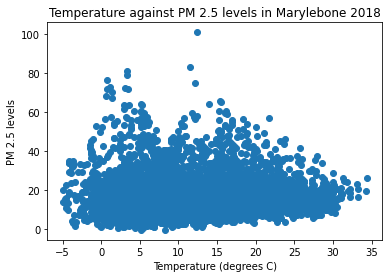

In [28]:
#Using the concatenate function to create a new DataFrame combining data for both locations
marylebone_temp_pm_2018 = pd.concat([heathrow_data_year_2018["Temperature (degrees C)"], marylebone_data_year_2018["PM10 particulate matter (Hourly measured)"],marylebone_data_year_2018["PM2.5 particulate matter (Hourly measured)"] ], axis = 1)

#Labelling the columns accordingly
marylebone_temp_pm_2018.columns = ["Temperature (degrees C)", "PM10", "PM 2.5"]

print(marylebone_temp_pm_2018)

#Creating a plot for the graph
fig, ax = plt.subplots()

ax.scatter(marylebone_temp_pm_2018["Temperature (degrees C)"], marylebone_temp_pm_2018["PM10"])

#Labelling the features of the graph
ax.set_xlabel("Temperature (degrees C)")
ax.set_ylabel("PM10 levels")
ax.set_title("Temperature against PM10 levels in Marylebone 2018")


#Creating a plot for the graph
fig, ax = plt.subplots()

ax.scatter(marylebone_temp_pm_2018["Temperature (degrees C)"], marylebone_temp_pm_2018["PM 2.5"])

#Labelling the features of the graph
ax.set_xlabel("Temperature (degrees C)")
ax.set_ylabel("PM 2.5 levels")
ax.set_title("Temperature against PM 2.5 levels in Marylebone 2018")



                     Precipitation (mm)  PM10  PM 2.5
2018-01-01 00:00:00                 NaN   NaN     NaN
2018-01-01 01:00:00                 NaN  24.6    12.7
2018-01-01 02:00:00                 NaN  18.7    11.6
2018-01-01 03:00:00                 NaN  17.2     7.6
2018-01-01 04:00:00                 NaN  10.8     2.3
...                                 ...   ...     ...
2018-12-31 19:00:00                 0.0  17.4    16.2
2018-12-31 20:00:00                 0.0  16.9    15.3
2018-12-31 21:00:00                 0.0  16.1    14.4
2018-12-31 22:00:00                 0.0  19.2    14.5
2018-12-31 23:00:00                 0.0  17.6    12.8

[8760 rows x 3 columns]


Text(0.5, 1.0, 'Precipitation against PM 10 levels in Marylebone 2018')

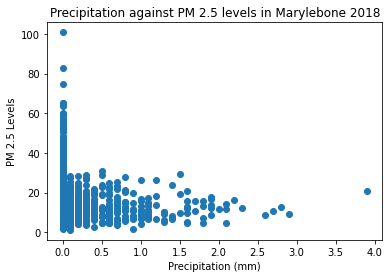

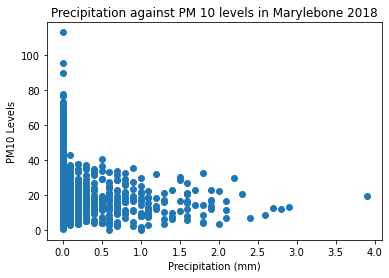

In [29]:
#Using the concatenate function to create a new DataFrame combining data for both locations
marylebone_precip_pm_2018 = pd.concat([heathrow_data_year_2018["Precipitation (mm)"], marylebone_data_year_2018["PM10 particulate matter (Hourly measured)"], marylebone_data_year_2018["PM2.5 particulate matter (Hourly measured)"]], axis = 1)

#Labelling the columns accordingly
marylebone_precip_pm_2018.columns = ["Precipitation (mm)", "PM10", "PM 2.5"]
print(marylebone_precip_pm_2018)

#Creating an empty plot
fig, ax = plt.subplots()

ax.scatter(marylebone_precip_pm_2018["Precipitation (mm)"], marylebone_precip_pm_2018["PM 2.5"])

#Labelling the features
ax.set_xlabel("Precipitation (mm)")
ax.set_ylabel("PM 2.5 Levels")
ax.set_title("Precipitation against PM 2.5 levels in Marylebone 2018")

#Creating an empty plot
fig, ax = plt.subplots()

ax.scatter(marylebone_precip_pm_2018["Precipitation (mm)"], marylebone_precip_pm_2018["PM10"])

ax.set_xlabel("Precipitation (mm)")
ax.set_ylabel("PM10 Levels")
ax.set_title("Precipitation against PM 10 levels in Marylebone 2018")


                     Wind direction (degrees)  PM10  PM 2.5
2018-01-01 00:00:00                     250.0   NaN     NaN
2018-01-01 01:00:00                     250.0  24.6    12.7
2018-01-01 02:00:00                     240.0  18.7    11.6
2018-01-01 03:00:00                     240.0  17.2     7.6
2018-01-01 04:00:00                     230.0  10.8     2.3
...                                       ...   ...     ...
2018-12-31 19:00:00                     270.0  17.4    16.2
2018-12-31 20:00:00                     270.0  16.9    15.3
2018-12-31 21:00:00                     290.0  16.1    14.4
2018-12-31 22:00:00                     280.0  19.2    14.5
2018-12-31 23:00:00                     290.0  17.6    12.8

[8760 rows x 3 columns]


Text(0.5, 1.0, 'Wind Direction against PM 2.5 Levels in Marylebone 2018')

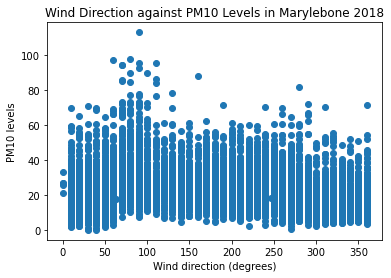

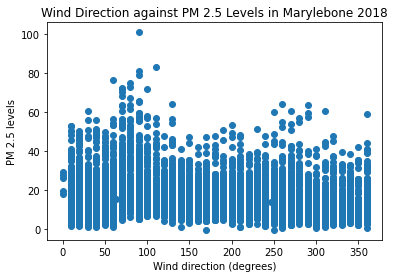

In [30]:
#Using the concatenate function to create a new DataFrame combining data for both locations
marylebone_wind_direc_pm_2018 = pd.concat([heathrow_data_year_2018["Wind direction (degrees)"], marylebone_data_year_2018["PM10 particulate matter (Hourly measured)"], marylebone_data_year_2018["PM2.5 particulate matter (Hourly measured)"]], axis = 1)

#Labelling the columns accordingly
marylebone_wind_direc_pm_2018.columns = ["Wind direction (degrees)", "PM10", "PM 2.5"]
print(marylebone_wind_direc_pm_2018)

#Creating an empty plot
fig, ax = plt.subplots()

ax.scatter(marylebone_wind_direc_pm_2018["Wind direction (degrees)"], marylebone_wind_direc_pm_2018["PM10"])

#Labelling the features of the graph accordingly
ax.set_xlabel("Wind direction (degrees)")
ax.set_ylabel("PM10 levels")
ax.set_title("Wind Direction against PM10 Levels in Marylebone 2018")


#Create an empty plot
fig, ax = plt.subplots()

ax.scatter(marylebone_wind_direc_pm_2018["Wind direction (degrees)"], marylebone_wind_direc_pm_2018["PM 2.5"])

#Labelling features of the graph
ax.set_xlabel("Wind direction (degrees)")
ax.set_ylabel("PM 2.5 levels")
ax.set_title("Wind Direction against PM 2.5 Levels in Marylebone 2018")

                     Wind speed (km/h)  PM10  PM 2.5
2018-01-01 00:00:00               31.7   NaN     NaN
2018-01-01 01:00:00               29.5  24.6    12.7
2018-01-01 02:00:00               24.1  18.7    11.6
2018-01-01 03:00:00               25.9  17.2     7.6
2018-01-01 04:00:00               20.5  10.8     2.3
...                                ...   ...     ...
2018-12-31 19:00:00               14.8  17.4    16.2
2018-12-31 20:00:00               14.8  16.9    15.3
2018-12-31 21:00:00               13.0  16.1    14.4
2018-12-31 22:00:00               13.0  19.2    14.5
2018-12-31 23:00:00               13.0  17.6    12.8

[8760 rows x 3 columns]


Text(0.5, 1.0, 'Wind Speed against PM 2.5 Levels in Marylebone 2018')

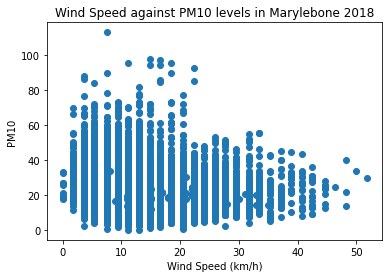

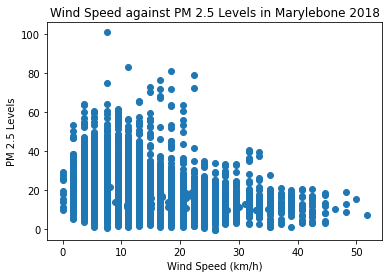

In [31]:
#Using the concatenate function to create a new DataFrame combining data for both locations
marylebone_wind_speed_pm_2018 = pd.concat([heathrow_data_year_2018["Wind speed (km/h)"], marylebone_data_year_2018["PM10 particulate matter (Hourly measured)"], marylebone_data_year_2018["PM2.5 particulate matter (Hourly measured)"]], axis = 1)

#Labelling columns accordingly
marylebone_wind_speed_pm_2018.columns = ["Wind speed (km/h)", "PM10", "PM 2.5"]
print(marylebone_wind_speed_pm_2018)

#Create an empty plot
fig, ax = plt.subplots()

ax.scatter(marylebone_wind_speed_pm_2018["Wind speed (km/h)"], marylebone_wind_speed_pm_2018["PM10"])

#Labelling the features of the graph
ax.set_xlabel("Wind Speed (km/h)")
ax.set_ylabel("PM10")
ax.set_title("Wind Speed against PM10 levels in Marylebone 2018")


#Create an empty plot
fig, ax = plt.subplots()

ax.scatter(marylebone_wind_speed_pm_2018["Wind speed (km/h)"], marylebone_wind_speed_pm_2018["PM 2.5"])

#Labelling the features of the graph
ax.set_xlabel("Wind Speed (km/h)")
ax.set_ylabel("PM 2.5 Levels")
ax.set_title("Wind Speed against PM 2.5 Levels in Marylebone 2018")

                     Wind gust (km/h)  PM10  PM 2.5
2018-01-01 00:00:00               NaN   NaN     NaN
2018-01-01 01:00:00               NaN  24.6    12.7
2018-01-01 02:00:00               NaN  18.7    11.6
2018-01-01 03:00:00               NaN  17.2     7.6
2018-01-01 04:00:00               NaN  10.8     2.3
...                               ...   ...     ...
2018-12-31 19:00:00              24.1  17.4    16.2
2018-12-31 20:00:00              24.1  16.9    15.3
2018-12-31 21:00:00              25.9  16.1    14.4
2018-12-31 22:00:00              25.9  19.2    14.5
2018-12-31 23:00:00              24.1  17.6    12.8

[8760 rows x 3 columns]


Text(0.5, 1.0, 'Wind Gust against PM 2.5 Levels in Marylebone 2018')

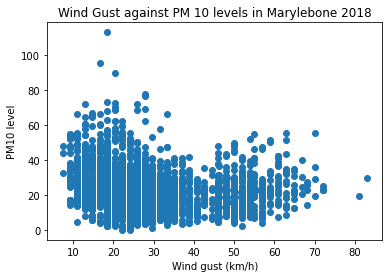

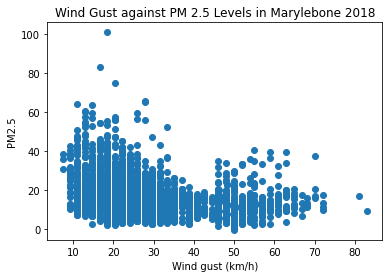

In [32]:
#Using the concatenate function to create a new DataFrame combining data for both locations
marylebone_wind_gust_pm_2018 = pd.concat([heathrow_data_year_2018["Wind gust (km/h)"], marylebone_data_year_2018["PM10 particulate matter (Hourly measured)"], marylebone_data_year_2018["PM2.5 particulate matter (Hourly measured)"]], axis = 1)

#Labelling the columns accordingly
marylebone_wind_gust_pm_2018.columns = ["Wind gust (km/h)", "PM10", "PM 2.5"]
print(marylebone_wind_gust_pm_2018)

#Creating an empty plot
fig, ax = plt.subplots()

ax.scatter(marylebone_wind_gust_pm_2018["Wind gust (km/h)"], marylebone_wind_gust_pm_2018["PM10"])

#Labelling the features of the graph
ax.set_xlabel("Wind gust (km/h)")
ax.set_ylabel("PM10 level")
ax.set_title("Wind Gust against PM 10 levels in Marylebone 2018")

#Creating an empty plot
fig, ax = plt.subplots()

ax.scatter(marylebone_wind_gust_pm_2018["Wind gust (km/h)"], marylebone_wind_gust_pm_2018["PM 2.5"])

#Labelling the features of the graph
ax.set_xlabel("Wind gust (km/h)")
ax.set_ylabel("PM2.5")
ax.set_title("Wind Gust against PM 2.5 Levels in Marylebone 2018")


                     Pressure (hPa)  PM10  PM 2.5
2018-01-01 00:00:00           997.5   NaN     NaN
2018-01-01 01:00:00           998.5  24.6    12.7
2018-01-01 02:00:00           999.5  18.7    11.6
2018-01-01 03:00:00           999.5  17.2     7.6
2018-01-01 04:00:00           999.7  10.8     2.3
...                             ...   ...     ...
2018-12-31 19:00:00          1035.3  17.4    16.2
2018-12-31 20:00:00          1035.2  16.9    15.3
2018-12-31 21:00:00          1035.3  16.1    14.4
2018-12-31 22:00:00          1035.0  19.2    14.5
2018-12-31 23:00:00          1034.9  17.6    12.8

[8760 rows x 3 columns]


Text(0.5, 1.0, 'Pressure against PM 2.5 Levels in Marylebone 2018')

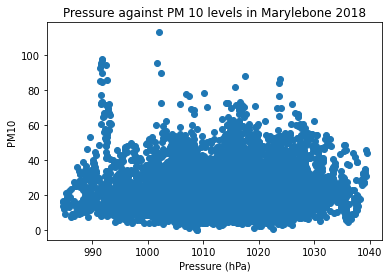

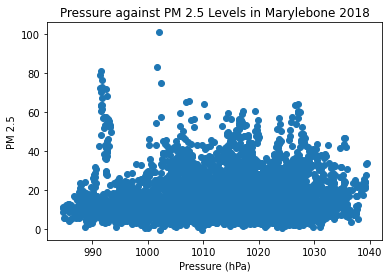

In [33]:
#Using the concatenate function to create a new DataFrame combining data for both locations
marylebone_pressure_pm_2018 = pd.concat([heathrow_data_year_2018["Pressure (hPa)"], marylebone_data_year_2018["PM10 particulate matter (Hourly measured)"], marylebone_data_year_2018["PM2.5 particulate matter (Hourly measured)"]], axis = 1)

#Labeling the columns accordingly
marylebone_pressure_pm_2018.columns = ["Pressure (hPa)", "PM10", "PM 2.5"]
print(marylebone_pressure_pm_2018)

#Creating an empty plot
fig, ax = plt.subplots()

ax.scatter(marylebone_pressure_pm_2018["Pressure (hPa)"], marylebone_pressure_pm_2018["PM10"])

#Labelling the features of the graph
ax.set_xlabel("Pressure (hPa)")
ax.set_ylabel("PM10")
ax.set_title("Pressure against PM 10 levels in Marylebone 2018")

#Create an empty plot
fig, ax = plt.subplots()

ax.scatter(marylebone_pressure_pm_2018["Pressure (hPa)"], marylebone_pressure_pm_2018["PM 2.5"])

#Labelling the features of the graph
ax.set_xlabel("Pressure (hPa)")
ax.set_ylabel("PM 2.5")
ax.set_title("Pressure against PM 2.5 Levels in Marylebone 2018") 